# my frist project in Machine learning internship SYNC INTERN'S

## Week 1 >>Task 1>>Create a chat Bot

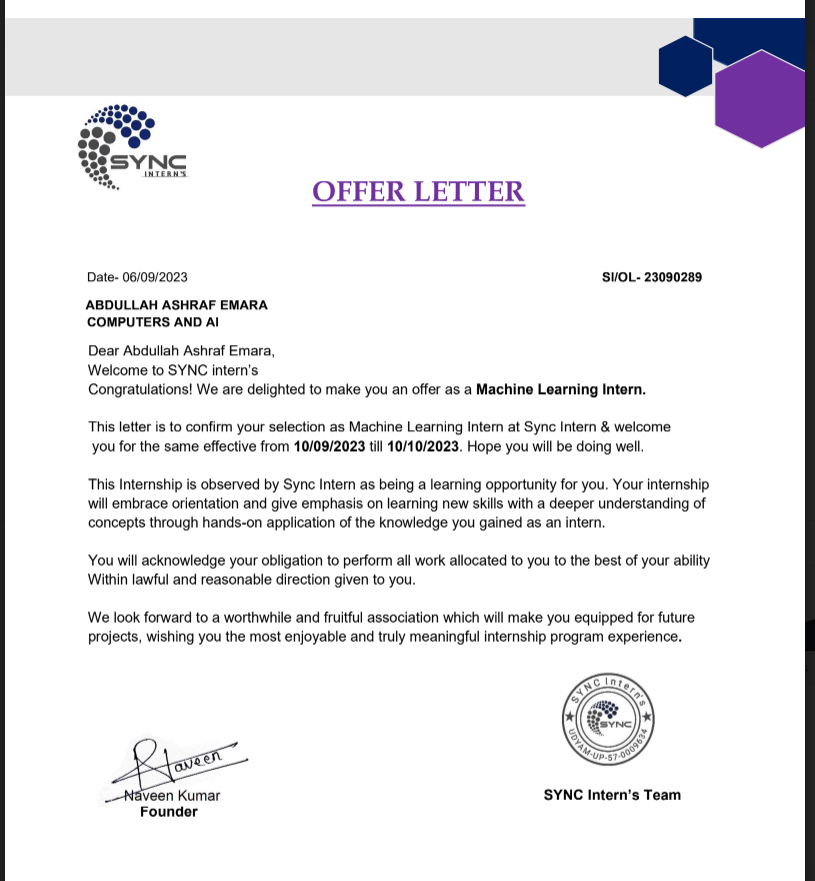![img.png](attachment:img.png)

In [2]:
#import Libraries
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
dataset = {
  "What is your name?": "my name is abdullah",
  "how old are you? ": "21",
  "what are you doing?": "I am student",
  "what do you study?": "I am studying artificial intelligence",
  "What university do you study at?": "Banha university",
  "What is the expected graduation year?": "2024",
  "What skills do you have?" : "C++ and Python programming languages, Ability to solve programming problems,Ability to analyze data and apply artificial intelligence,techniques on it Using data analysis libraries such as Pandas and Numpy and Matplotlibdata analysis using Python, Exel, and Power BIMachine Learning techniques such as linearregression, logistic regression, decision trees and KNNGood knowledge of neural networks , deep learning and NLP",
  "What do you do in your free time?": "I play football, watch football matches, read books, and learn new skills"




}

In [4]:
questions = list(dataset.keys())
answers = list(dataset.values())
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(questions)
question_sequences = tokenizer.texts_to_sequences(questions)
max_length = max([len(x) for x in question_sequences])
padded_questions = tf.keras.preprocessing.sequence.pad_sequences(question_sequences, maxlen=max_length, padding='post')


In [5]:
# Build the machine learning model
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(len(answers), activation='softmax')
])


#model compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 32)             736       
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 3368 (13.16 KB)
Trainable params: 3368 (13.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Train the model
model.fit(padded_questions, np.array(range(len(questions))), epochs=30)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 2.0817 - accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 2.0783 - accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 11ms/step - loss: 2.0753 - accuracy: 0.2500
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 2.0729 - accuracy: 0.2500
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 2.0706 - accuracy: 0.2500
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 2.0687 - accuracy: 0.2500
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 2.0669 - accuracy: 0.3750
Epoch 8/30
1/1 [==============================] - 0s 10ms/step - loss: 2.0651 - accuracy: 0.3750
Epoch 9/30
1/1 [==============================] - 0s 11ms/step - loss: 2.0631 - accuracy: 0.5000
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 2.0612 - accuracy: 0.5000
Epoch 11/30
1/1 [=======

In [8]:
# Define the chatbot interface
def chatbot():
    while True:
        user_input = input("ask me ")
        if user_input=='thanks':
            print ('your welcome')
            break
        else:
            user_sequence = tokenizer.texts_to_sequences([user_input])
            padded_user_sequence = tf.keras.preprocessing.sequence.pad_sequences(user_sequence, maxlen=max_length, padding='post')
            prediction = np.argmax(model.predict(padded_user_sequence))
            print(answers[prediction])

# Run the chatbot
chatbot()

KeyboardInterrupt: ignored